In [275]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.pyplot import arrow
from mpl_toolkits.axisartist.axislines import SubplotZero

from matplotlib.patches import Arc
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Tool functions

In [365]:
def get_line_plot(angle, *, linewidth=1, linestyle="-", color="black"):
    angle = math.radians(angle)
    
    return Line2D([0, math.cos(angle) * 0.92], [0, math.sin(angle) * 0.92], 
                  linewidth=linewidth, linestyle=linestyle, color=color)

In [600]:
def get_angle_plot(line1, line2, *, offset=1, color=None, origin=(0, 0), 
                   len_x_axis = 1, len_y_axis = 1):
    
    l1xy = line1.get_xydata()
    
    # Angle between line1 and x-axis
    y1 = l1xy[1][1] - l1xy[0][1]
    x1 = l1xy[1][0] - l1xy[0][0]
    slope1 = y1 / float(x1)
    # Allows you to use this in different quadrants
    angle1 = math.degrees(math.atan2(y1, x1))
    
    l2xy = line2.get_xydata()
    
    # Angle between line2 and x-axis
    y2 = l2xy[1][1] - l2xy[0][1]
    x2 = l2xy[1][0] - l2xy[0][0]
    slope2 = y2 / float(x2)
    angle2 = math.degrees(math.atan2(y2, x2))
    
    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)
    angle = theta2 - theta1
    
    if angle > 180:
        angle = 360 - angle
        theta1 = 360 + theta1
        if theta1 > theta2:
            theta1, theta2 = theta2, theta1
    
    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.
    
    return Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, 
               theta1, theta2, color=color, 
               label = r'${:.4}^\circ$'.format(float(angle)))

In [601]:
def get_angle_text(angle_plot):
    angle = angle_plot.get_label()
    # angle = r'${:.4}^\circ$'.format(angle) # Display angle upto 2 decimal places
    
    # Get the vertices of the angle arc
    vertices = angle_plot.get_verts()
    
    # Get the midpoint of the arc extremes
    x_width = (vertices[0][0] + vertices[-1][0]) / 2.0
    y_width = (vertices[0][1] + vertices[-1][1]) / 2.0
    separation_radius = max(x_width / 2.0, y_width / 2.0)
    
    return [x_width + separation_radius, y_width + separation_radius, angle]

### - Angle poltter class

In [501]:
class AnglePoltter:
    def __init__(self):
        self.lines = []
        self.arcs = []
        self.angles = []
    
    def add_line(self, angle, *, linewidth=1, linestyle="-", color="black"):
        line = get_line_plot(angle, linewidth=linewidth, linestyle=linestyle, color=color)
        self.lines.append(
            [
                line.get_xdata()[0], line.get_ydata()[0], line.get_xdata()[1], line.get_ydata()[1], 
                linewidth, linestyle, color
            ]
        )
        
        return line
    
    def add_angle(self, line1, line2, *, text=False, **kwargs):
        angle = get_angle_plot(line1, line2, **kwargs)
        self.arcs.append(angle)
        
        if text:
            self.angles.append(get_angle_text(angle))
        
    def plot(self, *, title, fontsize=18):
        fig = plt.figure()
        ax = SubplotZero(fig, 1, 1, 1)
        
        # draw a circle
        theta = np.linspace(0, 2 * np.pi, 200)
        x = np.cos(theta)
        y = np.sin(theta)
        ax.plot(x, y, color="#CCCCCC", linewidth=1.5)
        
        fig.add_subplot(ax)
        
        for direction in ["left", "right", "bottom", "top"]:
            # hides borders
            ax.axis[direction].set_visible(False)

        for direction in ["xzero", "yzero"]:
            # adds arrows at the ends of each axis
            ax.axis[direction].set_axisline_style('-|>')
            # adds X and Y-axis from the origin
            ax.axis[direction].set_visible(True)
        
        for line in self.lines:
            if line[4] != 0:
                ax.arrow(line[0], line[1], line[2], line[3],
                         head_width=0.06, head_length=0.06,
                         linewidth=line[4], linestyle=line[5], color=line[6])
        for arc in self.arcs:
            ax.add_patch(arc)
        for angle in self.angles:
            ax.text(*angle)
        
        if title != None:
            fig.suptitle(title, fontsize=fontsize)
        
        plt.axis([-1.8, 1.8, -1.35, 1.35])
        plt.grid()
        plt.legend()
        
        return ax

## Example - find 3 in two qubit system

### - initial state

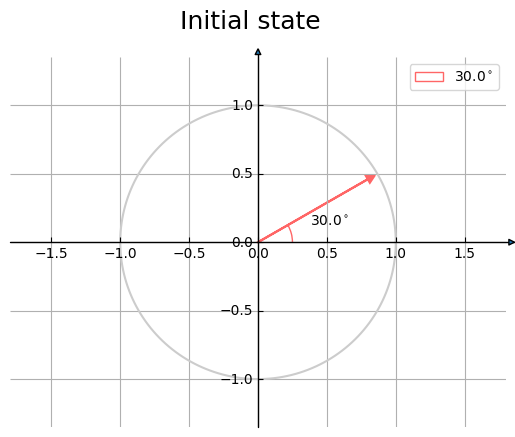

In [602]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(30, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.5, text=True)

ax = plotter.plot(title="Initial state")

### - apply Oracle

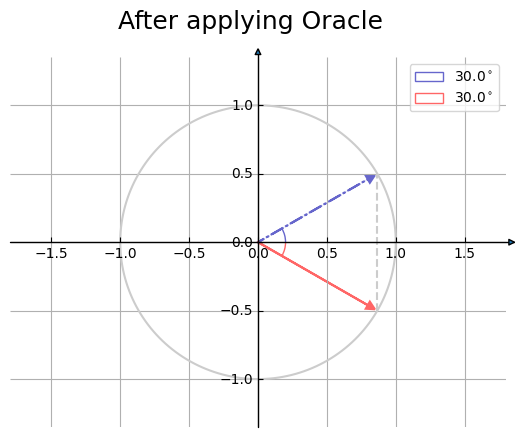

In [603]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(30, linewidth=1.5, linestyle="-.", color="#6666CC")
line_2 = plotter.add_line(330, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)

ax = plotter.plot(title="After applying Oracle")

x = math.cos(math.radians(30))
y = math.sin(math.radians(30))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))

### - one Grover iteration

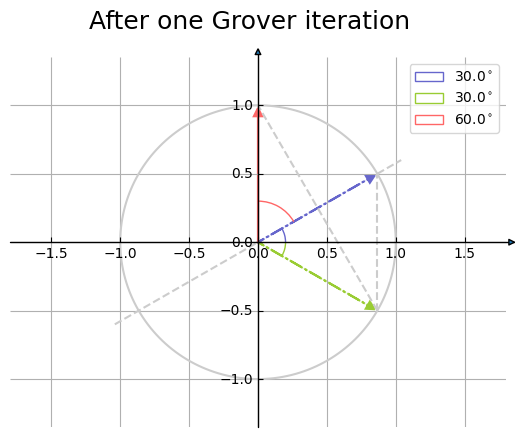

In [604]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(30, linewidth=1.5, linestyle="-.", color="#6666CC")
line_2 = plotter.add_line(330, linewidth=1.5, linestyle="-.", color="#99CC33")
line_3 = plotter.add_line(90, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)

ax = plotter.plot(title="After one Grover iteration")

x = math.cos(math.radians(30))
y = math.sin(math.radians(30))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, 0], [-y, 1], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([-x * 1.2, 0], [-y * 1.2, 0], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x * 1.2], [y, y * 1.2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

### - apply Oracle(second Iteration)

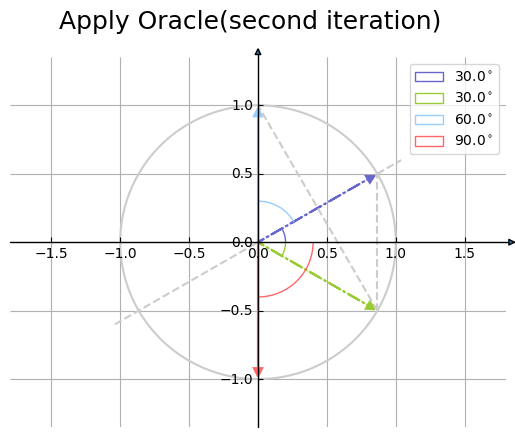

In [605]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(30, linewidth=1.5, linestyle="-.", color="#6666CC")
line_2 = plotter.add_line(330, linewidth=1.5, linestyle="-.", color="#99CC33")
line_3 = plotter.add_line(90, linewidth=1.5, color="#99CCFF")
line_4 = plotter.add_line(-90, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)
plotter.add_angle(line_4, x, offset=0.8)

ax = plotter.plot(title="Apply Oracle(second iteration)")

x = math.cos(math.radians(30))
y = math.sin(math.radians(30))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, 0], [-y, 1], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([-x * 1.2, 0], [-y * 1.2, 0], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x * 1.2], [y, y * 1.2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

### - second Grover iteration

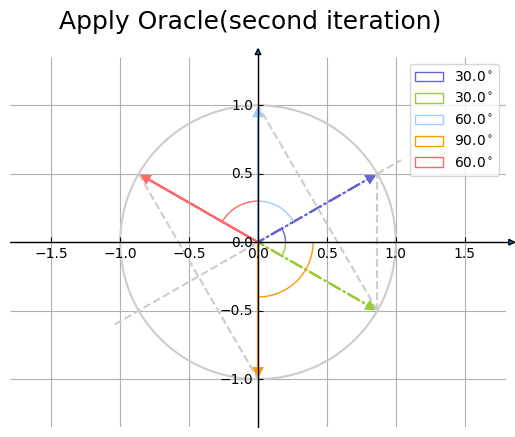

In [606]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(30, linewidth=1.5, linestyle="-.", color="#6666CC")
line_2 = plotter.add_line(330, linewidth=1.5, linestyle="-.", color="#99CC33")
line_3 = plotter.add_line(90, linewidth=1.5, color="#99CCFF")
line_4 = plotter.add_line(-90, linewidth=1.5, color="#FF9900")
line_5 = plotter.add_line(150, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)
plotter.add_angle(line_4, x, offset=0.8)
plotter.add_angle(line_5, line_3, offset=0.6)

ax = plotter.plot(title="Apply Oracle(second iteration)")

x = math.cos(math.radians(30))
y = math.sin(math.radians(30))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, 0], [-y, 1], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([-x, 0], [y, -1], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([-x * 1.2, 0], [-y * 1.2, 0], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x * 1.2], [y, y * 1.2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

## Example - find 6 in three qubit system

In [556]:
theta = math.degrees(math.asin(1/(8 ** 0.5)))

### - Initial State

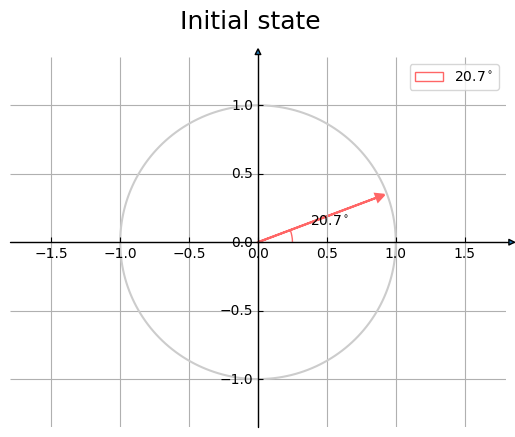

In [607]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(theta, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.5, text=True)

ax = plotter.plot(title="Initial state")

### - apply Oracle

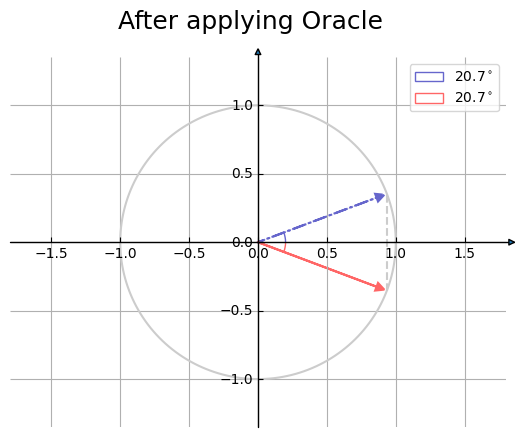

In [608]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(theta, linewidth=1.5, linestyle="-.", color="#6666CC")
line_2 = plotter.add_line(-theta, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)

ax = plotter.plot(title="After applying Oracle")

x = math.cos(math.radians(theta))
y = math.sin(math.radians(theta))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))

### - one grover iteration

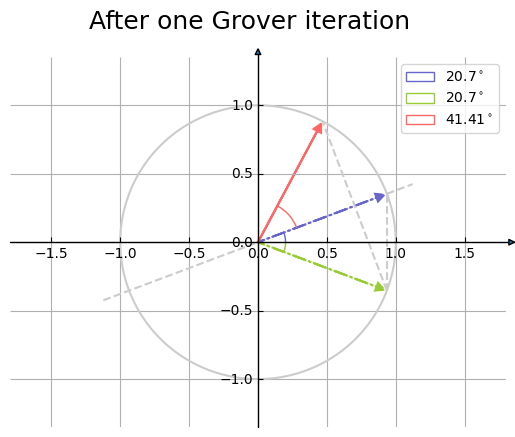

In [609]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(theta, linewidth=1.5, linestyle="-.", color="#6666CC")
line_2 = plotter.add_line(-theta, linewidth=1.5, linestyle="-.", color="#99CC33")
line_3 = plotter.add_line(3 * theta, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)

ax = plotter.plot(title="After one Grover iteration")

x = math.cos(math.radians(theta))
y = math.sin(math.radians(theta))
x2 = math.cos(math.radians(3 * theta))
y2 = math.sin(math.radians(3 * theta))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x2], [-y, y2], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([-x * 1.2, 0], [-y * 1.2, 0], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x * 1.2], [y, y * 1.2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

### - apply two iteration

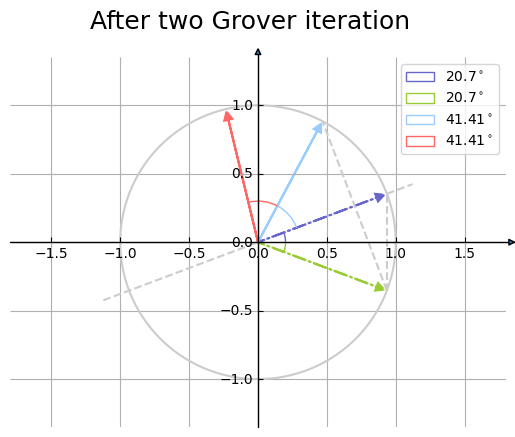

In [610]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(theta, linewidth=1.5, linestyle="-.", color="#6666CC")
line_2 = plotter.add_line(-theta, linewidth=1.5, linestyle="-.", color="#99CC33")
line_3 = plotter.add_line(3 * theta, linewidth=1.5, color="#99CCFF")
line_4 = plotter.add_line(5 * theta, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)
plotter.add_angle(line_4, line_3, offset=0.6)

ax = plotter.plot(title="After two Grover iteration")

x = math.cos(math.radians(theta))
y = math.sin(math.radians(theta))
x2 = math.cos(math.radians(3 * theta))
y2 = math.sin(math.radians(3 * theta))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x2], [-y, y2], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([-x * 1.2, 0], [-y * 1.2, 0], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x * 1.2], [y, y * 1.2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

### - apply three Grover iteration

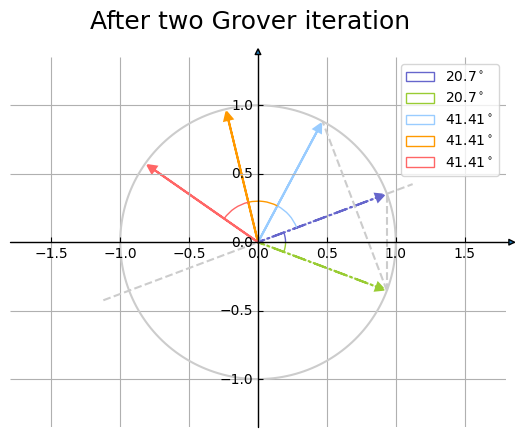

In [611]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(theta, linewidth=1.5, linestyle="-.", color="#6666CC")
line_2 = plotter.add_line(-theta, linewidth=1.5, linestyle="-.", color="#99CC33")
line_3 = plotter.add_line(3 * theta, linewidth=1.5, color="#99CCFF")
line_4 = plotter.add_line(5 * theta, linewidth=1.5, color="#FF9900")
line_5 = plotter.add_line(7 * theta, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)
plotter.add_angle(line_4, line_3, offset=0.6)
plotter.add_angle(line_5, line_4, offset=0.6)

ax = plotter.plot(title="After two Grover iteration")

x = math.cos(math.radians(theta))
y = math.sin(math.radians(theta))
x2 = math.cos(math.radians(3 * theta))
y2 = math.sin(math.radians(3 * theta))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x2], [-y, y2], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([-x * 1.2, 0], [-y * 1.2, 0], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x * 1.2], [y, y * 1.2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

## Worst case: 1/2

### - initial state

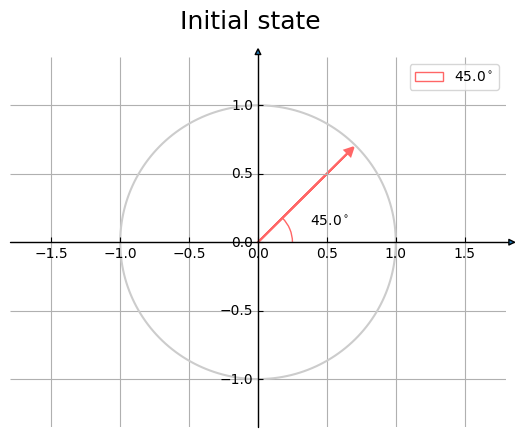

In [612]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.5, text=True)

ax = plotter.plot(title="Initial state")

### - apply Oracle

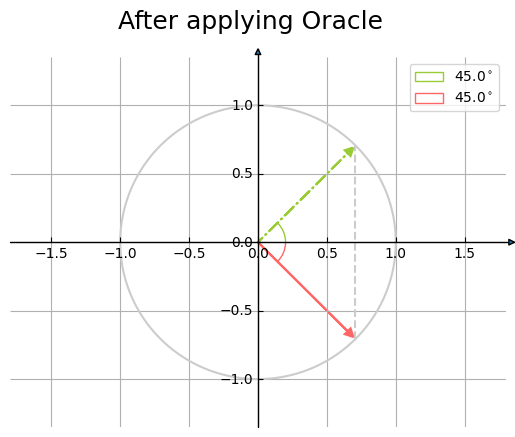

In [613]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, linestyle="-.", color="#99CC33")
line_2 = plotter.add_line(-45, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)

ax = plotter.plot(title="After applying Oracle")

x = math.cos(math.radians(45))
y = math.sin(math.radians(45))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))

### - one grover iteration

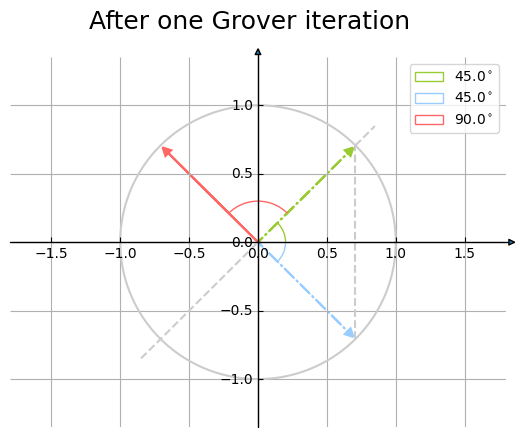

In [614]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, linestyle="-.", color="#99CC33")
line_2 = plotter.add_line(-45, linewidth=1.5, linestyle="-.", color="#99CCFF")
line_3 = plotter.add_line(3 * 45, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)

ax = plotter.plot(title="After one Grover iteration")

x = math.cos(math.radians(45))
y = math.sin(math.radians(45))
x2 = math.cos(math.radians(3 * 45))
y2 = math.sin(math.radians(3 * 45))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([-x * 1.2, 0], [-y * 1.2, 0], linewidth=1.5, linestyle="--", color="#CCCCCC"))
ax.add_line(Line2D([x, x * 1.2], [y, y * 1.2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

### - two grover iteration

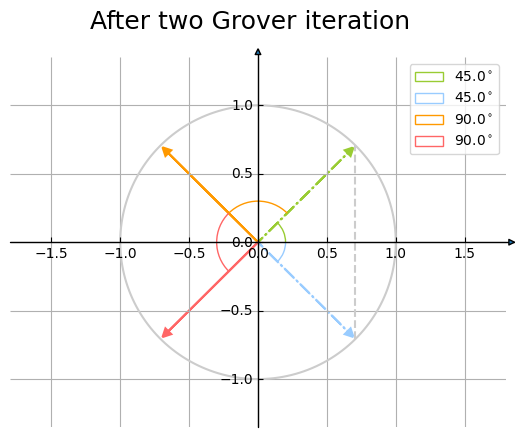

In [630]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, linestyle="-.", color="#99CC33")
line_2 = plotter.add_line(-45, linewidth=1.5, linestyle="-.", color="#99CCFF")
line_3 = plotter.add_line(3 * 45, linewidth=1.5, color="#FF9900")
line_4 = plotter.add_line(5 * 45, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)
plotter.add_angle(line_4, line_3, offset=0.6)

ax = plotter.plot(title="After two Grover iteration")

x = math.cos(math.radians(45))
y = math.sin(math.radians(45))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))

## Grover reflection

<AxesZeroSubplot: >

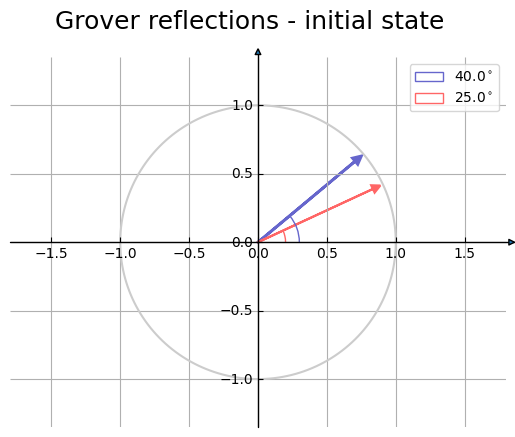

In [616]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_s = plotter.add_line(40, linewidth=2, color="#6666CC")
line_phi = plotter.add_line(25, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_s, x, offset=0.6)
plotter.add_angle(line_phi, x, offset=0.4)

plotter.plot(title="Grover reflections - initial state")

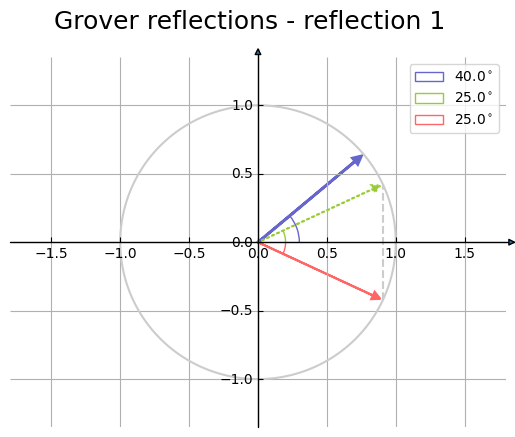

In [617]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_s = plotter.add_line(40, linewidth=2, color="#6666CC")
line_phi = plotter.add_line(25, linewidth=1.5, linestyle=":", color="#99CC33")
line_O_phi = plotter.add_line(335, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_s, x, offset=0.6)
plotter.add_angle(line_phi, x, offset=0.4)
plotter.add_angle(line_O_phi, x, offset=0.4)

ax = plotter.plot(title="Grover reflections - reflection 1")

x = math.cos(math.radians(25))
y = math.sin(math.radians(25))
ax.add_line(Line2D([x, x], [-y, y], linewidth=1.5, linestyle="--", color="#CCCCCC"))

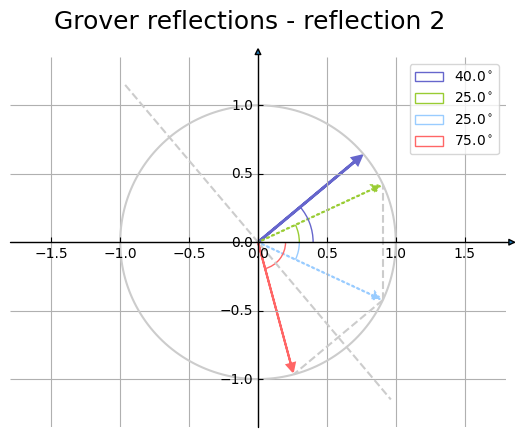

In [618]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_s = plotter.add_line(40, linewidth=2, color="#6666CC")
line_phi = plotter.add_line(25, linewidth=1.5, linestyle=":", color="#99CC33")
line_O_phi = plotter.add_line(335, linewidth=1.5, linestyle=":", color="#99CCFF")
line_RO_phi = plotter.add_line(285, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_s, x, offset=0.8)
plotter.add_angle(line_phi, x, offset=0.6)
plotter.add_angle(line_O_phi, x, offset=0.6)
plotter.add_angle(line_RO_phi, x, offset=0.4)

ax = plotter.plot(title="Grover reflections - reflection 2")

x1 = math.cos(math.radians(25))
y1 = math.sin(math.radians(25))
ax.add_line(Line2D([x1, x1], [-y1, y1], linewidth=1.5, linestyle="--", color="#CCCCCC"))

x2 = math.cos(math.radians(-75))
y2 = math.sin(math.radians(-75))
ax.add_line(Line2D([x1, x2], [-y1, y2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

x3 = math.cos(math.radians(130)) * 1.5
y3 = math.sin(math.radians(130)) * 1.5
ax.add_line(Line2D([x3, -x3], [y3, -y3], linewidth=1.5, linestyle="--", color="#CCCCCC"))

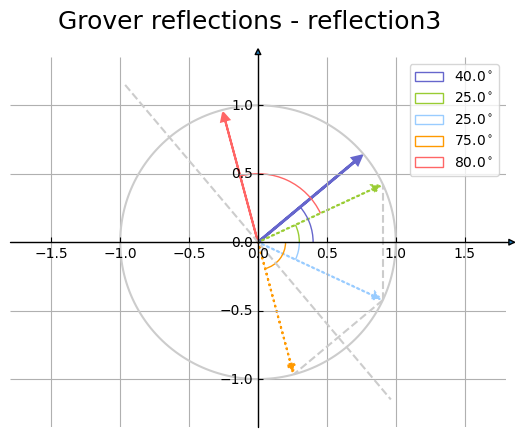

In [619]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_s = plotter.add_line(40, linewidth=2, color="#6666CC")
line_phi = plotter.add_line(25, linewidth=1.5, linestyle=":", color="#99CC33")
line_O_phi = plotter.add_line(335, linewidth=1.5, linestyle=":", color="#99CCFF")
line_RO_phi = plotter.add_line(285, linewidth=1.5, linestyle=":", color="#FF9900")
line_mRO_phi = plotter.add_line(105, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_s, x, offset=0.8)
plotter.add_angle(line_phi, x, offset=0.6)
plotter.add_angle(line_O_phi, x, offset=0.6)
plotter.add_angle(line_RO_phi, x, offset=0.4)
plotter.add_angle(line_mRO_phi, line_phi, offset=1)

ax = plotter.plot(title="Grover reflections - reflection3")

x1 = math.cos(math.radians(25))
y1 = math.sin(math.radians(25))
ax.add_line(Line2D([x1, x1], [-y1, y1], linewidth=1.5, linestyle="--", color="#CCCCCC"))

x2 = math.cos(math.radians(-75))
y2 = math.sin(math.radians(-75))
ax.add_line(Line2D([x1, x2], [-y1, y2], linewidth=1.5, linestyle="--", color="#CCCCCC"))

x3 = math.cos(math.radians(130)) * 1.5
y3 = math.sin(math.radians(130)) * 1.5
ax.add_line(Line2D([x3, -x3], [y3, -y3], linewidth=1.5, linestyle="--", color="#CCCCCC"))

## pi/2 phase demo

### - initial state

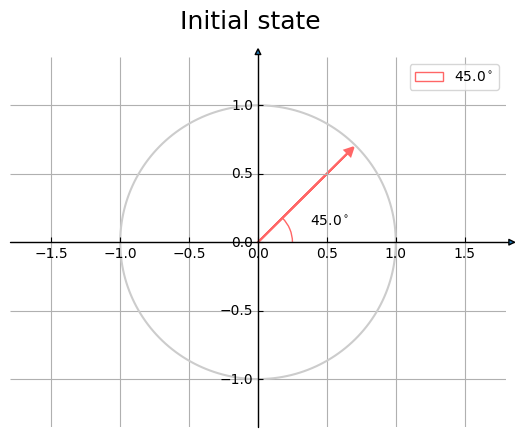

In [621]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.5, text=True)

ax = plotter.plot(title="Initial state")

### - Oracle

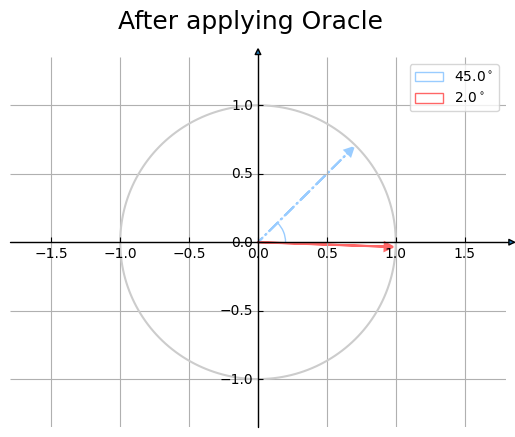

In [628]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, linestyle="-.", color="#99CCFF")
line_2 = plotter.add_line(-2, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)

ax = plotter.plot(title="After applying Oracle")

### - after grover iteration

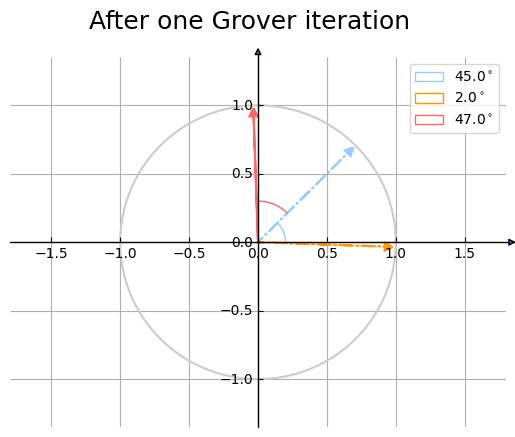

In [629]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, linestyle="-.", color="#99CCFF")
line_2 = plotter.add_line(-2, linewidth=1.5, linestyle="-.", color="#FF9900")
line_3 = plotter.add_line(92, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)

ax = plotter.plot(title="After one Grover iteration")

## 0.1pi phase demo

### - initial state

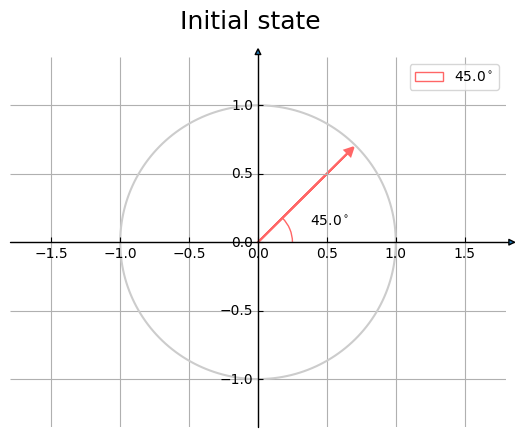

In [631]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.5, text=True)

ax = plotter.plot(title="Initial state")

### - oracle

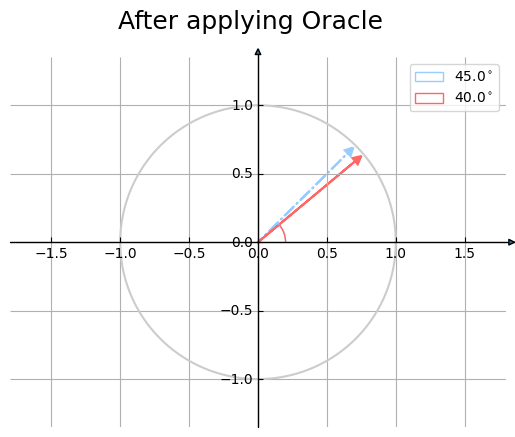

In [633]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, linestyle="-.", color="#99CCFF")
line_2 = plotter.add_line(40, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)

ax = plotter.plot(title="After applying Oracle")

### - after grover iteration

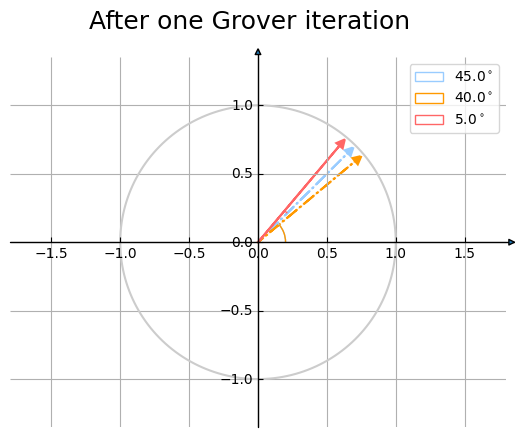

In [634]:
plotter = AnglePoltter()

# draw lines
x = plotter.add_line(0, linewidth=0)
line_1 = plotter.add_line(45, linewidth=1.5, linestyle="-.", color="#99CCFF")
line_2 = plotter.add_line(40, linewidth=1.5, linestyle="-.", color="#FF9900")
line_3 = plotter.add_line(50, linewidth=1.5, color="#FF6666")

# draw angles
plotter.add_angle(line_1, x, offset=0.4)
plotter.add_angle(line_2, x, offset=0.4)
plotter.add_angle(line_3, line_1, offset=0.6)

ax = plotter.plot(title="After one Grover iteration")